# Note before starting: **Please use Google Collab environment**
# **Importing necessary libraries**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters  as iaa
import cv2
import ntpath
import random

import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim 
from torch.utils.data import random_split
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader 

plt.rcParams["figure.figsize"] = (15,10)

In [2]:
#pytorch version used 
print(torch.__version__)

1.7.0+cu101


In [3]:
# to mount your own drive to google collab environment
from google.colab import files, drive 
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading collected driving data** which has images with respective steering angles and throttles. Note:loading data from google drive 


In [4]:
collected_data1 = np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-1.npy', allow_pickle=True)
collected_data2 = np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-2.npy', allow_pickle=True)
collected_data3 = np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-3.npy', allow_pickle=True)
collected_data4 = np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-4.npy', allow_pickle=True)
collected_data5 = np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-5.npy', allow_pickle=True)
collected_data6 = np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-6.npy', allow_pickle=True)
collected_data7 = np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-7.npy', allow_pickle=True)
collected_data8 = np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-8.npy', allow_pickle=True)
collected_data9 = np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-9.npy', allow_pickle=True)
collected_data10 = np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-10.npy', allow_pickle=True)
collected_data11= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-11.npy', allow_pickle=True)
collected_data12= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-12.npy', allow_pickle=True)
collected_data13= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-13.npy', allow_pickle=True)
collected_data14= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-14.npy', allow_pickle=True)
collected_data15= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-15.npy', allow_pickle=True)
collected_data16= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-16.npy', allow_pickle=True)
collected_data17= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-17.npy', allow_pickle=True)
collected_data18= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-18.npy', allow_pickle=True)
collected_data19= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-19.npy', allow_pickle=True)
collected_data20= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-20.npy', allow_pickle=True)
collected_data21= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-21.npy', allow_pickle=True)
collected_data22= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-22.npy', allow_pickle=True)
collected_data23= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-23.npy', allow_pickle=True)
collected_data24= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-24.npy', allow_pickle=True)
collected_data25= np.load('/content/drive/My Drive/Big Data Project/training_data_angle/training_data-25.npy', allow_pickle=True)

train_images =  np.concatenate((collected_data1, collected_data2, collected_data3, collected_data4, collected_data5, collected_data6, collected_data7, collected_data8, collected_data9, collected_data10, collected_data11, collected_data12, collected_data13, collected_data14, collected_data15, collected_data16, collected_data17, collected_data18, collected_data19, collected_data20, collected_data21, collected_data22, collected_data23, collected_data24, collected_data25))

print ("Train Image Dataset: ", train_images.shape)

Train Image Dataset:  (100000, 2)


Steering angle is -0.420654296875
Throttle value is 0.6588134765625


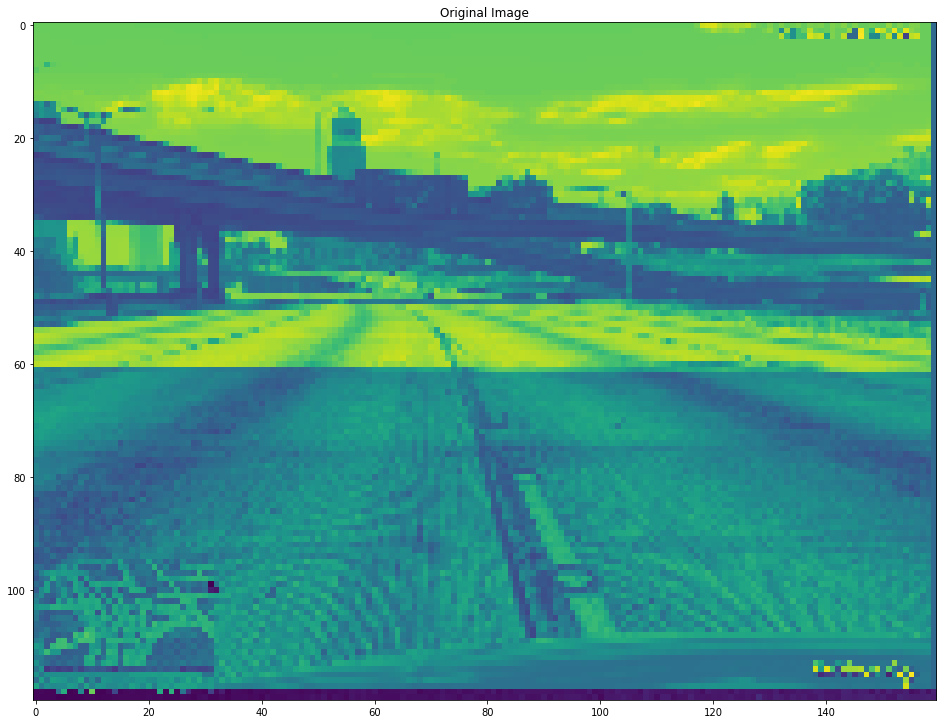

In [ ]:
# a random image from the data loaded above with response targets 
def print_dataset_image(train_images): 
  image, choice = train_images[random.randint(0,len(train_images)-1)]

  fig, axs = plt.subplots(1, 1, figsize=(15, 10), squeeze=False)
  fig.tight_layout()
  axs[0,0].imshow(image)
  axs[0,0].set_title('Original Image')

  print('Steering angle is {}'.format(choice[0]))
  print('Throttle value is {}'.format(choice[1]))

print_dataset_image(train_images)

# **Data Pre-processing**

# 1) Inspecting response targets: steering angle and throttle values with more scrutiny for any bias

In [5]:
# get steering angle and throttle values from all images 

def get_steering_angles(train_images): 
  steering_angles = []

  for data in train_images:
    steering_angle = data [1][0]
    
    steering_angles.append(steering_angle)

  steering = np.array(steering_angles)
  return steering

steering = get_steering_angles(train_images)

In [6]:
def get_throttle_values(train_images): 
  throttle_values = []

  for data in train_images:
    throttle_value = data [1][1]
    
    throttle_values.append(throttle_value)

  throttle = np.array(throttle_values)
  return throttle

throttle = get_throttle_values(train_images)

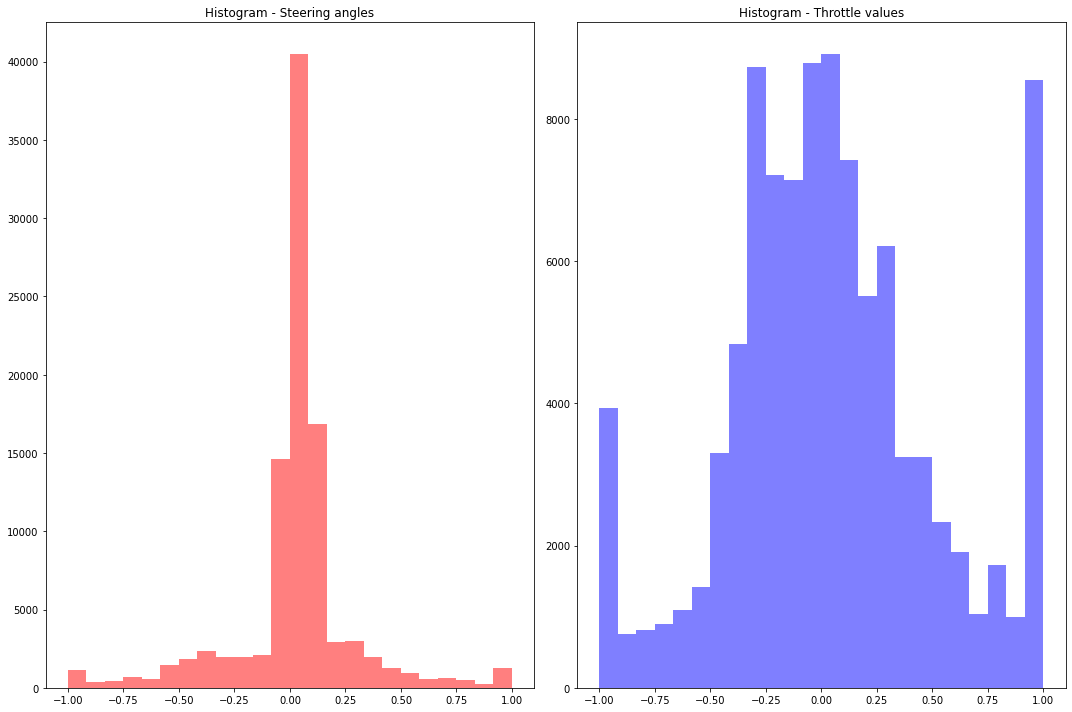

In [9]:
def print_histograms(steering, throttle): 
  plt.style.use('seaborn-deep')

  bins = np.linspace(-1, 1, 25)

  plt.subplot(1, 2, 1)
  plt.hist(steering, bins, alpha=0.5, label='steering angle', color = ['r'])
  plt.title('Histogram - Steering angles')

  plt.subplot(1, 2, 2)
  plt.hist(throttle, bins, alpha=0.5, label='throttle values', color = ['b'])
  plt.title('Histogram - Throttle values')

  plt.tight_layout()
  plt.show()

print_histograms(steering, throttle)

# OBSERVATION: a huge number of samples close to zero for the histogram with steering angles and hence, bias exits. 

In [10]:
# filtering data

samples_per_bin = 10000 #increase this value, to remove less data
remove = []
bins = np.linspace(-1, 1, 25) #make sure it matches the value used inside print_histograms() function


print('Total images before filtering ', len(train_images))
#print(bins)

for i in range(len(bins)): #loop through each bin
  current_bin = []
  for j in range(len(steering)): #consider all steering angles 
    if steering[j] >= bins[i] and steering[j]<=bins[i+1]: #if present in current bin
      current_bin.append(j) 
  current_bin = shuffle(current_bin) 
  current_bin = current_bin[samples_per_bin:] #delete a few elements
  remove.extend(current_bin)

print ('# of images removed ', len(remove))

train_images = np.delete(train_images, remove, axis=0)

print ('# of images remaining after filtering ', len (train_images))

Total images before filtering  100000
# of images removed  41921
# of images remaining after filtering  58079


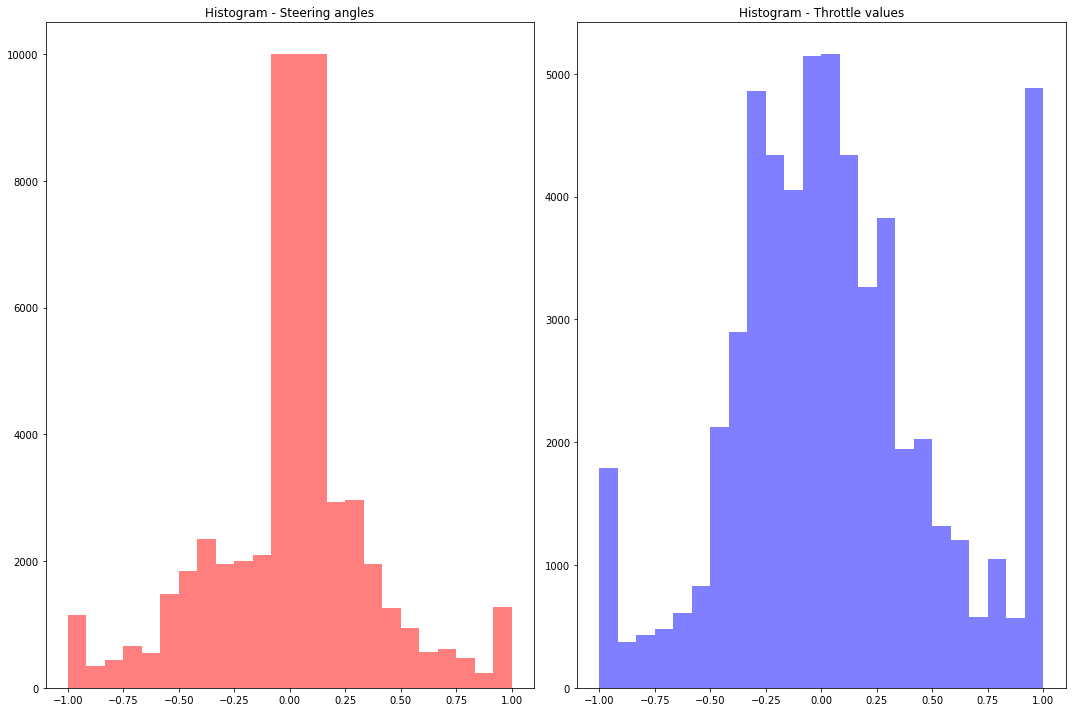

In [11]:
# plot histograms for filtered data 

steering = get_steering_angles(train_images)
throttle = get_throttle_values(train_images)

print_histograms(steering, throttle)

# 2) Data Augmentation

In [12]:
#function to flip the image and steering angle

def flip_image(image, choice):
  image = cv2.flip(image, 1)  #flip image
  steering=choice[0]
  throttle=choice[1]
  steering = -steering #change sign of steering angle
  new_choice = [steering, throttle]
  return image, new_choice 

In [13]:
flipped_images = []
for data in train_images: #consider all images
  image = data [0]
  choice = data [1]
  flipped_image, flipped_choice = flip_image(image, choice) #call to above defined function
  flipped_images.append([flipped_image, flipped_choice])

flipped_images =np.array(flipped_images) #augmented data

Text(0.5, 1.0, 'Flipped Image')

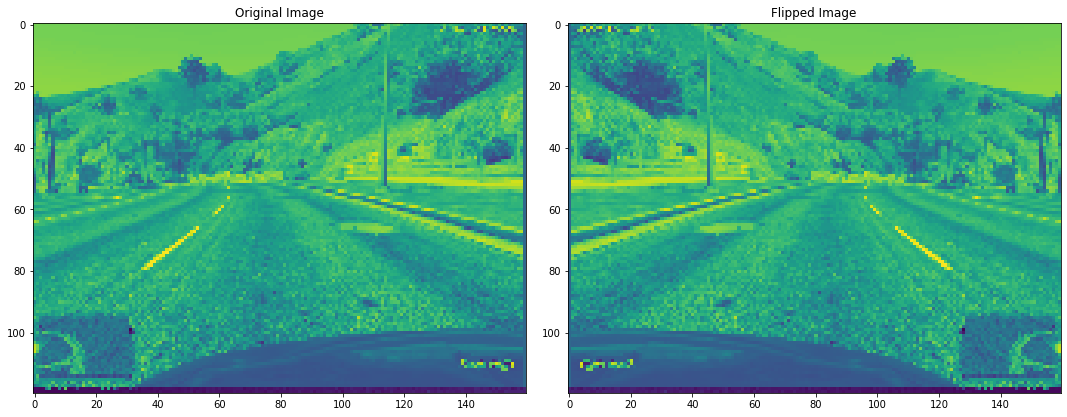

In [14]:
# visualize the flipped image compared with original 

image_org, choice_org = train_images[0]
image_flipped, choice_flipped = flipped_images[0]

fig, axs = plt.subplots(1, 2, figsize=(15, 10), squeeze=False)
fig.tight_layout()
axs[0,0].imshow(image_org)
axs[0,0].set_title('Original Image')

axs[0,1].imshow(image_flipped)
axs[0,1].set_title('Flipped Image')

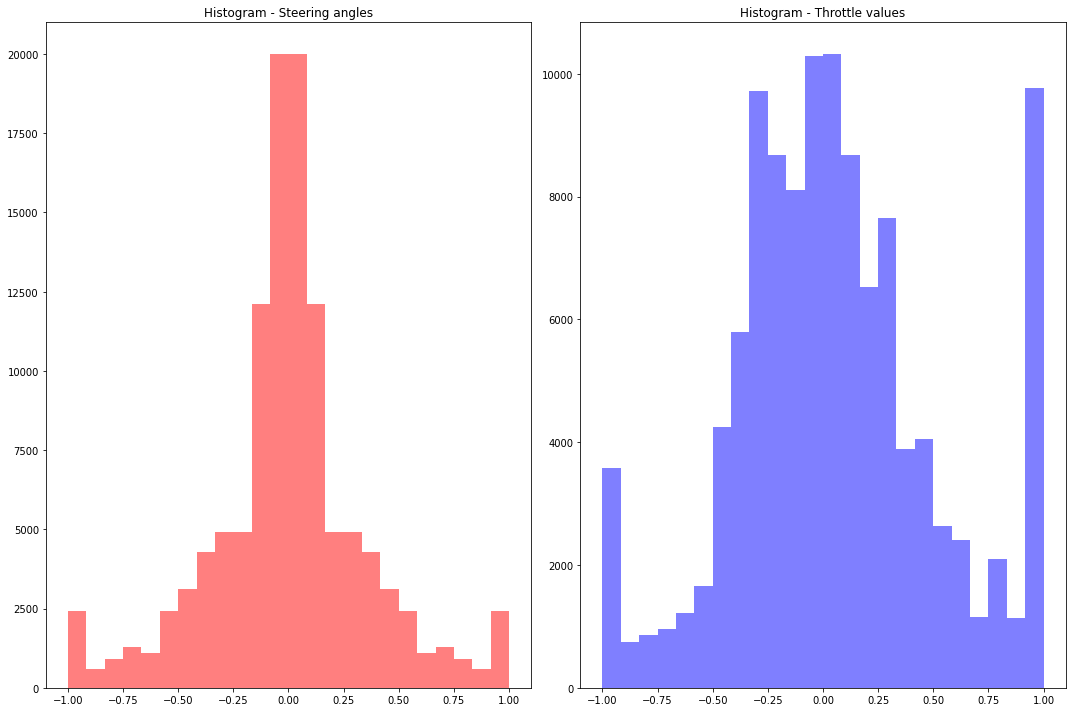

In [15]:
# merge all flipped images with original images to get one dataset 
train_images = np.concatenate((train_images,flipped_images))

# get steering angle and throttle values from all images 
steering = get_steering_angles(train_images)
throttle = get_throttle_values(train_images)

print_histograms(steering, throttle)

# 3) Image transformations have been defined to generalize the model performance 

In [17]:
# Zoom, panning and brighten transformations have been applied to randomly selected images 

def zoom_image(image): #to remove any unnecessary information about trees, sky, car hood
  zoom_img = iaa.Affine(scale = (1, 1.3))
  image = zoom_img.augment_image(image)
  return image

def pan_image(image): #focus on subject and gives a feeling of movement by blurring background
  pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

def image_random_brightness(image): # makes a photo more clear
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

def image_transforms(train_image): # calls to all above defined functions

  img, label = train_image

  pan_img= pan_image(img)
    
  zoom_img = zoom_image(pan_img)

  transformed_img = image_random_brightness(zoom_img) #pan+zoom+bright
  
  augmented_image = []
  augmented_image.append(transformed_img)
  augmented_image.append(label)
  augmented_image = np.array(augmented_image)

  return augmented_image

Text(0.5, 1.0, 'Bright image')

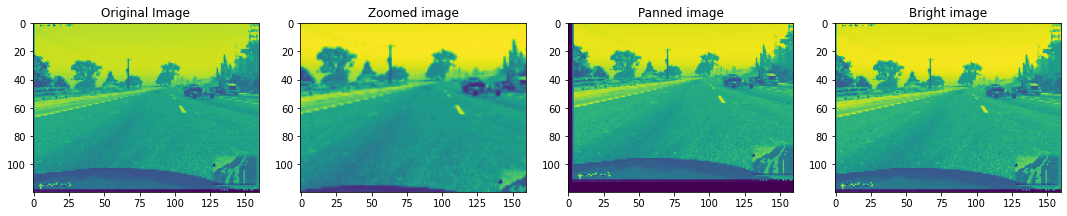

In [22]:
# visualize these transformations 

image, choice = train_images [random.randint(0,len(train_images)-1)]
zoomed_image = zoom_image(image)
panned_image = pan_image(image)
bright_image = image_random_brightness(image)

fig, axs = plt.subplots(1, 4, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed image')

axs[2].imshow(panned_image)
axs[2].set_title('Panned image')

axs[3].imshow(bright_image)
axs[3].set_title('Bright image')

# End of data pre-processing 
# Convert **training images into tensor form** after applying image transformations

In [23]:
# functions to make an input image fit for pytorch Neural Network architecture 

WIDTH = 160 #fixed 
HEIGHT = 120 #fixed

def img_to_dict(train_img): #convert image from ndarray to dict format
  img, label = train_img
  label = np.array(label)
  instance = {'image':img, 'label':label}
  return instance 

def Rescale(instance): #make sure that each input image to the model is of the same dimension
  img, label = instance['image'], instance['label']
  img = img.reshape(1,WIDTH,HEIGHT) 
  instance = {'image':img, 'label':label}
  return instance

def ToTensor(instance): #convert image in dict format into a tensor 
  img, label = instance['image'], instance['label']
  instance = {'image':torch.from_numpy(img) ,'label': torch.from_numpy(label)} 
  return instance

In [24]:
batch_size = 500 # this can be changed

train_images_copy = train_images
all_instances = [] #list of training images after all transformations defined above have been applied 
list_instances = [] 

for train_img in train_images_copy:  #for each training image
  if np.random.rand() < 0.5: # to make sure only selective random images are panned+zoomed+brightened and NOT all
    train_img = image_transforms(train_img) #function call

  #function calls for all training images 
  dict_img = img_to_dict(train_img) 
  instance = Rescale(dict_img)
  instance = ToTensor(instance)
  all_instances.append(instance) 

list_instances.append(all_instances) 

dataset = torch.utils.data.ConcatDataset(list_instances) #all transformed training image data

# Create **training and validation dataloader** to make input fit for pytorch architecture 

In [26]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_size = int(len(dataset)*0.8)
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset,[train_size, val_size])
train_dataloader = DataLoader(train_dataset,batch_size,shuffle=True,num_workers=1) 
val_dataloader = DataLoader(val_dataset,batch_size,shuffle=True,num_workers=1) 

In [27]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

for batch_idx, batch in enumerate(train_dataloader): 
  inputs,targets = batch['image'].to(device), batch['label'].to(device)
  break

print(inputs.shape)
print(len(train_dataloader))

torch.Size([500, 1, 160, 120])
186


# **Neural Network Architectures using pytorch **

# **First Attempt:** Define CNN architecture (reference: Comma.ai model for steering angle prediction)



In [28]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #to make use of GPU if made available 

class Net_comma_ai(nn.Module): 
  def __init__(self): 

    super(Net_comma_ai, self).__init__()

    self.conv_1 = nn.Conv2d(1,16, kernel_size=8, stride=4)
    self.conv_2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
    self.conv_3 = nn.Conv2d(32, 64, kernel_size=5, stride=2)

    self.linear_1 = nn.Linear(2240, 512) # input of 2240 is determined from output of last conv 2d layer
    self.linear_2 = nn.Linear(512, 2)  # output is vehicle control: steering and throttle  

    self.dropout = nn.Dropout(p=0.2) #reduce overfitting

    self.elu = torch.nn.ELU() # elu is used as activation to increase non-linearity

  def forward(self,x):

    # Conv 2d layers
    x = self.conv_1(x)
    x = self.elu(x)

    x = self.conv_2(x)
    x = self.elu(x)

    x = self.conv_3(x)
    x = x.reshape(x.size(0), -1) #flatten
    x = self.dropout(x)
    x = self.elu(x)

    #linear dense layers (fully connected)
    x = self.linear_1(x) 
    x = self.dropout(x)
    x = self.elu(x)

    pred = self.linear_2(x) #no softmax for output
    return (pred)

net_comma_ai = Net_comma_ai().to(device)
print(net_comma_ai)

Net_comma_ai(
  (conv_1): Conv2d(1, 16, kernel_size=(8, 8), stride=(4, 4))
  (conv_2): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2))
  (conv_3): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
  (linear_1): Linear(in_features=2240, out_features=512, bias=True)
  (linear_2): Linear(in_features=512, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (elu): ELU(alpha=1.0)
)


# **Second Attempt**: Define a modified version of Comma.ai's CNN model for steering angle pred

In [29]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

class Net_comma_ai_modified(nn.Module): 
  def __init__(self): 

    super(Net_comma_ai_modified, self).__init__()

    self.conv_1 = nn.Conv2d(1,16, kernel_size=8, stride=4)
    self.conv_2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
    self.conv_3 = nn.Conv2d(32, 64, kernel_size=5, stride=2)

    self.linear_1 = nn.Linear(2240, 512) # input of 2240 is determined from output of last conv 2d layer
    self.linear_2 = nn.Linear(512, 128)  
    self.linear_3 = nn.Linear(128,50)
    self.linear_4 = nn.Linear(50,2) # output is vehicle control: steering and throttle  

    self.dropout = nn.Dropout(p=0.2) #reduce overfitting

    self.elu = torch.nn.ELU() # elu is used as activation to increase non-linearity

  def forward(self,x):

    # Conv 2d layers
    x = self.conv_1(x)
    x = self.elu(x)
    x = self.dropout(x)

    x = self.conv_2(x)
    x = self.elu(x)
    x = self.dropout(x)

    x = self.conv_3(x)
    x = self.elu(x)
    x = self.dropout(x)

    x = x.reshape(x.size(0), -1) #flatten

    #linear dense layers (fully connected)
    x = self.linear_1(x) 
    x = self.dropout(x)
    x = self.elu(x)

    x = self.linear_2(x) 
    x = self.dropout(x)
    x = self.elu(x)

    x = self.linear_3(x) 
    x = self.elu(x)

    pred = self.linear_4(x) #no softmax for output

    return (pred)

net_comma_ai_modified = Net_comma_ai_modified().to(device)
print(net_comma_ai_modified)

Net_comma_ai_modified(
  (conv_1): Conv2d(1, 16, kernel_size=(8, 8), stride=(4, 4))
  (conv_2): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2))
  (conv_3): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
  (linear_1): Linear(in_features=2240, out_features=512, bias=True)
  (linear_2): Linear(in_features=512, out_features=128, bias=True)
  (linear_3): Linear(in_features=128, out_features=50, bias=True)
  (linear_4): Linear(in_features=50, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (elu): ELU(alpha=1.0)
)


# **Final and Best Attempt**: Define CNN architecture (reference source: Nvidia Research Paper)

In [30]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

class Net(nn.Module): 
  def __init__(self): 

    super(Net, self).__init__()

    self.conv_1 = nn.Conv2d(1,24, kernel_size=5, stride=2)
    self.conv_2 = nn.Conv2d(24, 36, kernel_size=5, stride=2)
    self.conv_3 = nn.Conv2d(36, 48, kernel_size=5, stride=2)
    self.conv_4 = nn.Conv2d(48, 64, kernel_size=3)
    self.conv_5 = nn.Conv2d(64, 64, kernel_size=3)

    # CAN ADD this and label the new architecture to be modified NVIDIA. 
    #self.maxpool_1 = nn.MaxPool2d(2, stride=1) #######################

    self.linear_1 = nn.Linear(6656, 100) # input of 6656 is determined from output of last conv 2d layer
    self.linear_2 = nn.Linear(100, 50)  
    self.linear_3 = nn.Linear(50, 10)  
    self.linear_4 = nn.Linear(10, 2) # output is vehicle control: steering and throttle  

    self.dropout = nn.Dropout(p=0.5) #reduce overfitting

    self.elu = torch.nn.ELU() # elu is used as activation to increase non-linearity

  def forward(self,x): 
    # Conv 2d layers
    x = self.conv_1(x)
    x = self.elu(x)
    #x = self.maxpool_1(x) #########################

    x = self.conv_2(x)
    x = self.elu(x)

    x = self.conv_3(x)
    x = self.elu(x)

    x = self.conv_4(x)
    x = self.elu(x)

    x = self.conv_5(x)
    x = self.elu(x)

    x = x.reshape(x.size(0), -1) #flatten

    #linear dense layers (fully connected)
    x = self.linear_1(x) 
    x = self.elu(x)
    x = self.dropout(x)

    x = self.linear_2(x) 
    x = self.elu(x)
    x = self.dropout(x)

    x = self.linear_3(x) 
    x = self.elu(x)
    x = self.dropout(x)

    pred = self.linear_4(x) #no softmax for output

    return (pred)

net_nvidia = Net().to(device)
print(net_nvidia)

Net(
  (conv_1): Conv2d(1, 24, kernel_size=(5, 5), stride=(2, 2))
  (conv_2): Conv2d(24, 36, kernel_size=(5, 5), stride=(2, 2))
  (conv_3): Conv2d(36, 48, kernel_size=(5, 5), stride=(2, 2))
  (conv_4): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv_5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (linear_1): Linear(in_features=6656, out_features=100, bias=True)
  (linear_2): Linear(in_features=100, out_features=50, bias=True)
  (linear_3): Linear(in_features=50, out_features=10, bias=True)
  (linear_4): Linear(in_features=10, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (elu): ELU(alpha=1.0)
)


# **Train and validation process**
# CNN based on Comma.ai model (**first attempt**)



In [31]:
# hyper parameters can be played around with 

epochs = 20 
learning_rate = 0.001
optimizer = optim.Adam(net_comma_ai.parameters(), lr=learning_rate) #######################
criterion = nn.MSELoss() 

# checking if GPU is available
if torch.cuda.is_available():
    net_comma_ai = net_comma_ai.cuda() ########################
    criterion = criterion.cuda()

In [32]:
train_loss_list_comma_ai=[]
val_loss_list_comma_ai=[]

for epoch in range(epochs):

  ##### train #####
  net_comma_ai.train() ###################################
  running_loss=0.0

  for batch_idx, batch in enumerate(train_dataloader): #for every batch 
    inputs,targets = batch['image'].to(device,dtype=torch.float), batch['label'].to(device,dtype=torch.float)

    # Training pass
    optimizer.zero_grad()
        
    output = net_comma_ai(inputs) #################################
    loss = criterion(output, targets)
        
    #This is where the model learns by backpropagating
    loss.backward()
        
    #And optimizes its weights here
    optimizer.step()
  
    running_loss += loss.item()

  #end of loop 

  train_loss_list_comma_ai.append(running_loss/(batch_idx+1))  
  print("Epoch {} - Training loss: {}".format(epoch+1, running_loss/(batch_idx+1)))


  ##### validation #####
  net_comma_ai.eval() #################################
  running_val_loss=0.0

  with torch.no_grad():

    for batch_idx, batch in enumerate(val_dataloader): #for each batch 

      inputs,targets = batch['image'].to(device,dtype=torch.float), batch['label'].to(device,dtype=torch.float)
      pred_outputs = net_comma_ai(inputs) #################################

      val_loss = criterion(pred_outputs, targets)
      
      running_val_loss += val_loss.item()

    #end of loop 
    val_loss_list_comma_ai.append(running_val_loss/(batch_idx+1))
    print("Epoch {} - Validation loss: {}".format(epoch+1, running_val_loss/(batch_idx+1)))  
    print('\n')

Epoch 1 - Training loss: 3.9784004593728692
Epoch 1 - Validation loss: 0.17085161551516106


Epoch 2 - Training loss: 0.1904383780815268
Epoch 2 - Validation loss: 0.16324417958868312


Epoch 3 - Training loss: 0.1796935825578628
Epoch 3 - Validation loss: 0.1598047617268055


Epoch 4 - Training loss: 0.17355997507931084
Epoch 4 - Validation loss: 0.16799611836037737


Epoch 5 - Training loss: 0.16722945732775554
Epoch 5 - Validation loss: 0.1601839595018549


Epoch 6 - Training loss: 0.16148265955909605
Epoch 6 - Validation loss: 0.15764987151673499


Epoch 7 - Training loss: 0.1579171311791225
Epoch 7 - Validation loss: 0.15343704439224082


Epoch 8 - Training loss: 0.1553085685897899
Epoch 8 - Validation loss: 0.15102298811395118


Epoch 9 - Training loss: 0.15259278589679348
Epoch 9 - Validation loss: 0.15027642630516214


Epoch 10 - Training loss: 0.1513802622274686
Epoch 10 - Validation loss: 0.1472890671897442


Epoch 11 - Training loss: 0.14946899426880703
Epoch 11 - Validation

# Modified CNN based on Comma.ai model (**second attempt**)

In [33]:
epochs = 20
learning_rate = 0.001
optimizer = optim.Adam(net_comma_ai_modified.parameters(), lr=learning_rate) #######################
criterion = nn.MSELoss() 

# checking if GPU is available
if torch.cuda.is_available():
    net_comma_ai_modified = net_comma_ai_modified.cuda() ########################
    criterion = criterion.cuda()

In [34]:
train_loss_list_comma_ai_modified=[]
val_loss_list_comma_ai_modified=[]

for epoch in range(epochs):

  ##### train #####
  net_comma_ai_modified.train() ###################################
  running_loss=0.0

  for batch_idx, batch in enumerate(train_dataloader): #for every batch 
    inputs,targets = batch['image'].to(device,dtype=torch.float), batch['label'].to(device,dtype=torch.float)

    # Training pass
    optimizer.zero_grad()
        
    output = net_comma_ai_modified(inputs) #################################
    loss = criterion(output, targets)
        
    #This is where the model learns by backpropagating
    loss.backward()
        
    #And optimizes its weights here
    optimizer.step()
  
    running_loss += loss.item()

  #end of loop 

  train_loss_list_comma_ai_modified.append(running_loss/(batch_idx+1))  
  print("Epoch {} - Training loss: {}".format(epoch+1, running_loss/(batch_idx+1)))


  ##### validation #####
  net_comma_ai_modified.eval() #################################
  running_val_loss=0.0

  with torch.no_grad():

    for batch_idx, batch in enumerate(val_dataloader): #for each batch 

      inputs,targets = batch['image'].to(device,dtype=torch.float), batch['label'].to(device,dtype=torch.float)
      pred_outputs = net_comma_ai_modified(inputs) #################################

      val_loss = criterion(pred_outputs, targets)
      
      running_val_loss += val_loss.item()

    #end of loop 
    val_loss_list_comma_ai_modified.append(running_val_loss/(batch_idx+1))
    print("Epoch {} - Validation loss: {}".format(epoch+1, running_val_loss/(batch_idx+1)))  
    print('\n')

Epoch 1 - Training loss: 0.22606012721856436
Epoch 1 - Validation loss: 0.16377201232504338


Epoch 2 - Training loss: 0.16334468743173025
Epoch 2 - Validation loss: 0.15807278771349725


Epoch 3 - Training loss: 0.15658711417708346
Epoch 3 - Validation loss: 0.1471151183260248


Epoch 4 - Training loss: 0.14787816857137986
Epoch 4 - Validation loss: 0.13628107436159823


Epoch 5 - Training loss: 0.14005872230696423
Epoch 5 - Validation loss: 0.13487406154262258


Epoch 6 - Training loss: 0.13298059010537722
Epoch 6 - Validation loss: 0.12483061818366355


Epoch 7 - Training loss: 0.12746237126249138
Epoch 7 - Validation loss: 0.12035764722113913


Epoch 8 - Training loss: 0.12207975879471789
Epoch 8 - Validation loss: 0.1172372522823354


Epoch 9 - Training loss: 0.11683993834641672
Epoch 9 - Validation loss: 0.116226667577916


Epoch 10 - Training loss: 0.11259748954926768
Epoch 10 - Validation loss: 0.11153347742684344


Epoch 11 - Training loss: 0.10829643925191254
Epoch 11 - Valid

# CNN architecture based on NVIDIA model (**final and best attempt**)

In [35]:
epochs = 20
learning_rate = 0.001
optimizer = optim.Adam(net_nvidia.parameters(), lr=learning_rate) #######################
criterion = nn.MSELoss() 

# checking if GPU is available
if torch.cuda.is_available():
    net_nvidia = net_nvidia.cuda() ########################
    criterion = criterion.cuda()

In [36]:
train_loss_list_nvidia=[]
val_loss_list_nvidia=[]

for epoch in range(epochs):

  ##### train #####
  net_nvidia.train() ###################################
  running_loss=0.0

  for batch_idx, batch in enumerate(train_dataloader): #for every batch 
    inputs,targets = batch['image'].to(device,dtype=torch.float), batch['label'].to(device,dtype=torch.float)

    # Training pass
    optimizer.zero_grad()
        
    output = net_nvidia(inputs) #################################
    loss = criterion(output, targets)
        
    #This is where the model learns by backpropagating
    loss.backward()
        
    #And optimizes its weights here
    optimizer.step()
  
    running_loss += loss.item()

  #end of loop 

  train_loss_list_nvidia.append(running_loss/(batch_idx+1))  
  print("Epoch {} - Training loss: {}".format(epoch+1, running_loss/(batch_idx+1)))


  ##### validation #####
  net_nvidia.eval() #################################
  running_val_loss=0.0

  with torch.no_grad():

    for batch_idx, batch in enumerate(val_dataloader): #for each batch 

      inputs,targets = batch['image'].to(device,dtype=torch.float), batch['label'].to(device,dtype=torch.float)
      pred_outputs = net_nvidia(inputs) #################################

      val_loss = criterion(pred_outputs, targets)
      
      running_val_loss += val_loss.item()

    #end of loop 
    val_loss_list_nvidia.append(running_val_loss/(batch_idx+1))
    print("Epoch {} - Validation loss: {}".format(epoch+1, running_val_loss/(batch_idx+1)))  
    print('\n')

Epoch 1 - Training loss: 0.26737037437256944
Epoch 1 - Validation loss: 0.17196837194422457


Epoch 2 - Training loss: 0.19158322340057743
Epoch 2 - Validation loss: 0.17113185150826232


Epoch 3 - Training loss: 0.1800297368117558
Epoch 3 - Validation loss: 0.16976693938387202


Epoch 4 - Training loss: 0.1749953329563141
Epoch 4 - Validation loss: 0.1673087648888852


Epoch 5 - Training loss: 0.17042978844975912
Epoch 5 - Validation loss: 0.16286181198789718


Epoch 6 - Training loss: 0.16478409097399763
Epoch 6 - Validation loss: 0.15302376734449508


Epoch 7 - Training loss: 0.1572076760793245
Epoch 7 - Validation loss: 0.14347204661115687


Epoch 8 - Training loss: 0.15176174004552184
Epoch 8 - Validation loss: 0.13897201815184126


Epoch 9 - Training loss: 0.1463898556527271
Epoch 9 - Validation loss: 0.13470648054746873


Epoch 10 - Training loss: 0.14216328256072536
Epoch 10 - Validation loss: 0.13171133224634415


Epoch 11 - Training loss: 0.1385940843291821
Epoch 11 - Validat

# **Train and validation loss plots** as a performance metric

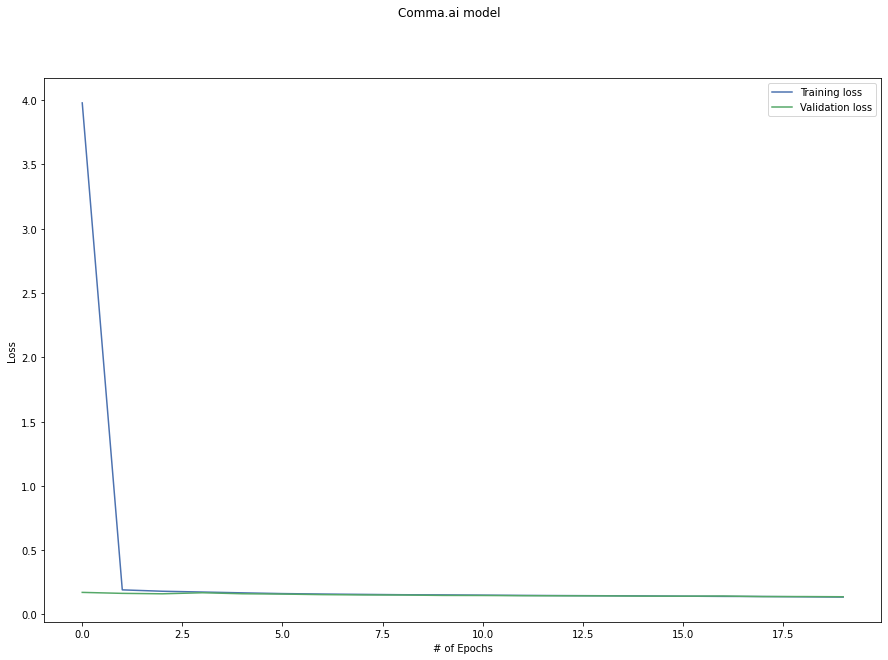

In [37]:
# plotting the training and validation loss
fig = plt.figure()
plt.plot(train_loss_list_comma_ai, label='Training loss')
plt.plot(val_loss_list_comma_ai, label='Validation loss')
fig.suptitle('Comma.ai model')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

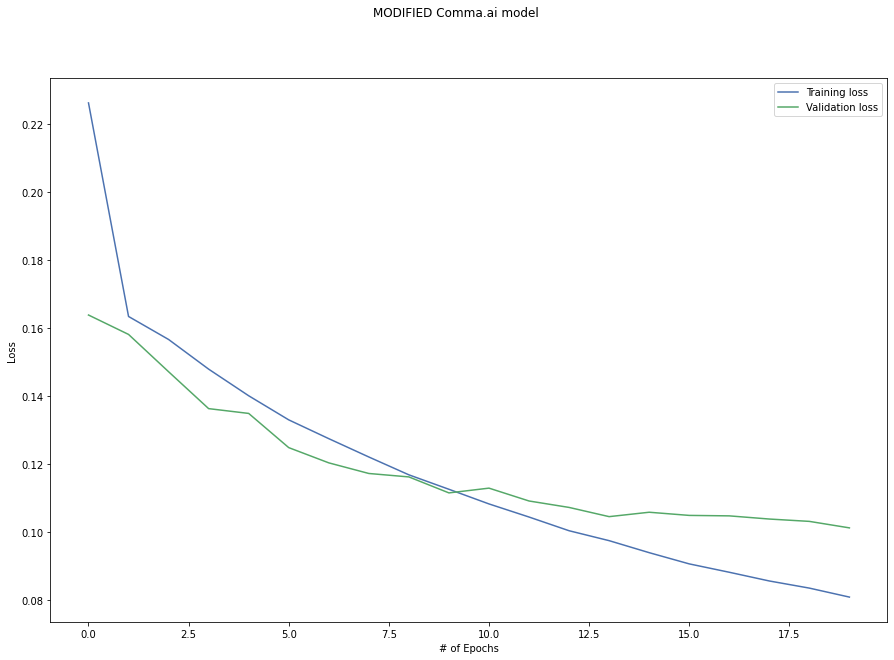

In [38]:
# plotting the training and validation loss
fig = plt.figure()
plt.plot(train_loss_list_comma_ai_modified, label='Training loss')
plt.plot(val_loss_list_comma_ai_modified, label='Validation loss')
fig.suptitle('MODIFIED Comma.ai model')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

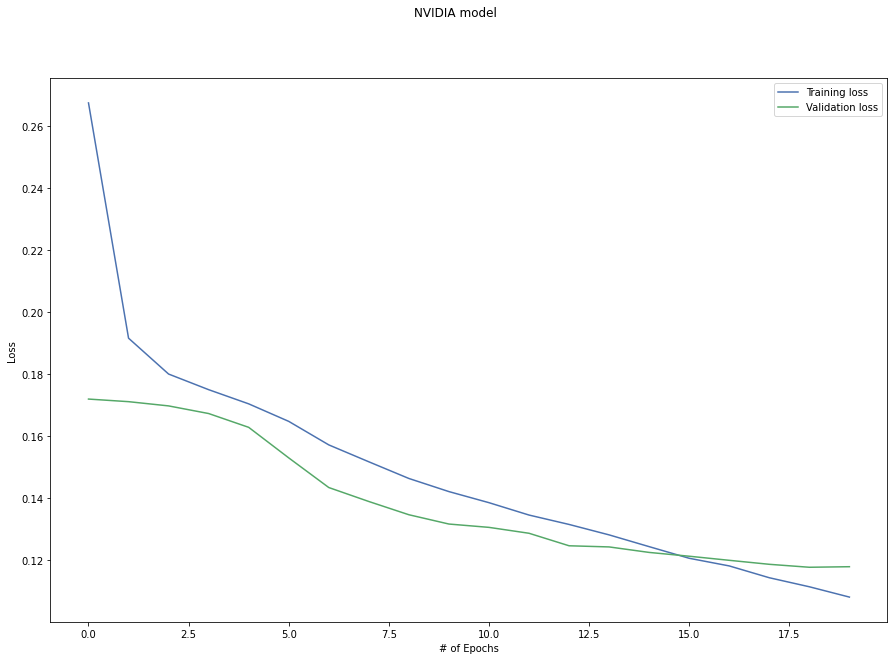

In [39]:
# plotting the training and validation loss
fig = plt.figure()
plt.plot(train_loss_list_nvidia, label='Training loss')
plt.plot(val_loss_list_nvidia, label='Validation loss')
fig.suptitle('NVIDIA model')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Save the trained model**

In [40]:
# save model to be used for testing 
# NOTE: Pytorch saved model when reloaded for use, will need defining the architecture before use. It is unlike what you observe in keras. 

def save_model(model, model_name, iter):
  path = f'/content/drive/My Drive/Big Data Project/nvidia_playsGTA_{model_name}_iter_{iter}.pth' # trained model parameters saved in a file with .pth extension
  print(f'Saving {model_name} model') 
  torch.save(model.state_dict(), path) 
  print(f'{model_name} saved successfully.')

save_model(net_nvidia, 'vatsal', 3) #considered model with best performance

Saving vatsal model
vatsal saved successfully.


# Process to **load the trained model** for the reader's reference 

In [ ]:
#model_save_name = 'nvidia_playsGTA_vatsal_iter_3.pth'
#path = f"/content/drive/My Drive/Big Data Project/{model_save_name}"
#net_nvidia.load_state_dict(torch.load(path))

<All keys matched successfully>

# END of model training. 